<a href="https://colab.research.google.com/github/mldurga/projects/blob/main/fire_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai -Uqq
# from fastai.vision.all import *

     |████████████████████████████████| 189 kB 4.2 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 


In [2]:
from fastai.vision.all import *

In [4]:
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/


In [5]:
path=fastai_cfg().path('data')/'fire_smoke'
path.mkdir(parents=True,exist_ok=True)
!kaggle datasets download -d ashutosh69/fire-and-smoke-dataset -p {path}
path.ls()

 95% 239M/252M [00:01<00:00, 171MB/s]
100% 252M/252M [00:01<00:00, 166MB/s]


(#1) [Path('/root/.fastai/data/fire_smoke/fire-and-smoke-dataset.zip')]

In [6]:
Path.BASE_PATH=path
path.ls()

(#1) [Path('fire-and-smoke-dataset.zip')]

In [7]:
!unzip -qq {path}/fire-and-smoke-dataset.zip -d {path} 

In [8]:
path.ls()

(#2) [Path('fire-and-smoke-dataset.zip'),Path('data')]

In [9]:
path=path/'data'/'data'/'img_data'

In [10]:
(path/'train/fire').ls(), (path/'train/smoke').ls()


((#430) [Path('data/data/img_data/train/fire/img_385.jpg'),Path('data/data/img_data/train/fire/2.WhatsApp_Image_2018-05-29_at_8.jpeg'),Path('data/data/img_data/train/fire/78.waffle-fire.jpg'),Path('data/data/img_data/train/fire/37.APTOPIX-Petrochemical-Fire-Texas-1-1553128135.jpg'),Path('data/data/img_data/train/fire/19.920x920.jpg'),Path('data/data/img_data/train/fire/img_763.jpg'),Path('data/data/img_data/train/fire/65.c1e29dc5-63ff-4c99-8530-c325b829bb16-022619_auburn_hills_fire_rg_9.jpg'),Path('data/data/img_data/train/fire/img_431.jpg'),Path('data/data/img_data/train/fire/58.69222639.jpg'),Path('data/data/img_data/train/fire/68.09fire1.jpg')...],
 (#457) [Path('data/data/img_data/train/smoke/img_819.jpg'),Path('data/data/img_data/train/smoke/img_824.jpg'),Path('data/data/img_data/train/smoke/53.400_F_248118663_wLIdS25iBbKBVWhBu4Q8D3eYGyCws0if.jpg'),Path('data/data/img_data/train/smoke/img_1054.jpg'),Path('data/data/img_data/train/smoke/43.1089126196672_10702591.jpg'),Path('data/da

In [11]:
!mv {path}/train/smoke/* {path}/train/fire

In [12]:
(path/'train/fire').ls(), (path/'train/smoke').ls()

((#865) [Path('data/data/img_data/train/fire/img_819.jpg'),Path('data/data/img_data/train/fire/img_385.jpg'),Path('data/data/img_data/train/fire/2.WhatsApp_Image_2018-05-29_at_8.jpeg'),Path('data/data/img_data/train/fire/img_824.jpg'),Path('data/data/img_data/train/fire/53.400_F_248118663_wLIdS25iBbKBVWhBu4Q8D3eYGyCws0if.jpg'),Path('data/data/img_data/train/fire/78.waffle-fire.jpg'),Path('data/data/img_data/train/fire/img_1054.jpg'),Path('data/data/img_data/train/fire/37.APTOPIX-Petrochemical-Fire-Texas-1-1553128135.jpg'),Path('data/data/img_data/train/fire/43.1089126196672_10702591.jpg'),Path('data/data/img_data/train/fire/19.920x920.jpg')...],
 (#0) [])

In [17]:
!rm -rf {path}/test/smoke

In [16]:
(path/'test/fire').ls(), (path/'test/smoke').ls()

((#87) [Path('data/data/img_data/test/fire/img_320.jpg'),Path('data/data/img_data/test/fire/img_125.jpg'),Path('data/data/img_data/test/fire/img_327.jpg'),Path('data/data/img_data/test/fire/img_122.jpg'),Path('data/data/img_data/test/fire/img_245.jpg'),Path('data/data/img_data/test/fire/img_136.jpg'),Path('data/data/img_data/test/fire/img_108.jpg'),Path('data/data/img_data/test/fire/img_126.jpg'),Path('data/data/img_data/test/fire/img_321.jpg'),Path('data/data/img_data/test/fire/img_134.jpg')...],
 (#0) [])

In [15]:
!mv {path}/test/smoke/* {path}/test/fire

In [19]:
(path/'train').ls()

(#2) [Path('data/data/img_data/train/default'),Path('data/data/img_data/train/fire')]

In [17]:
db=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
            get_items=get_image_files,get_y=parent_label,
            splitter=GrandparentSplitter(train_name='train',valid_name='test'),
            item_tfms=RandomResizedCrop(460),batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

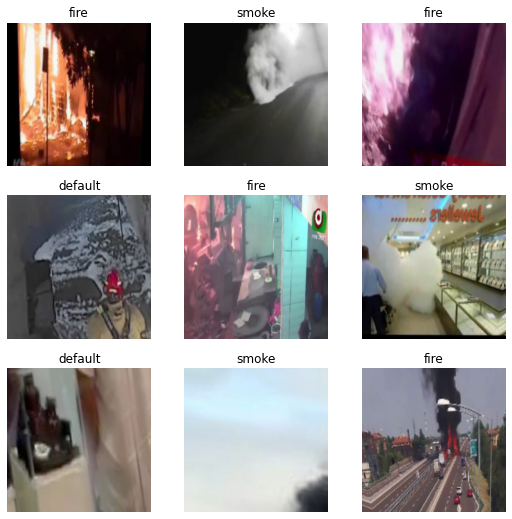

In [18]:
dls=db.dataloaders(path)
dls.show_batch()

SuggestedLRs(valley=0.0010000000474974513)

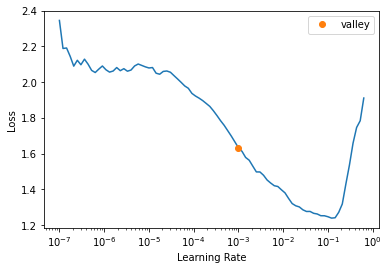

In [13]:
learn=cnn_learner(dls,resnet50, metrics=accuracy)
learn.lr_find()

In [14]:
learn.fine_tune(10,0.001)

epoch,train_loss,valid_loss,accuracy,time
0,1.183139,0.759190,0.730994,00:27


epoch,train_loss,valid_loss,accuracy,time
0,0.717564,0.754349,0.748538,00:32
1,0.634068,0.887656,0.760234,00:31
2,0.582530,0.990181,0.690058,00:30
3,0.541472,0.809591,0.754386,00:30
4,0.504868,0.907128,0.701754,00:30
5,0.431940,0.967569,0.690058,00:30
6,0.399845,0.891740,0.707602,00:30
7,0.350431,0.865342,0.707602,00:30
8,0.326437,0.876107,0.707602,00:30
9,0.314235,0.884345,0.666667,00:30


with RandomResizedcrop and aug 224 and withe base lr

In [16]:
learn2=cnn_learner(dls,resnet50, metrics=accuracy)
learn2.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.447737,0.984263,0.730994,00:25
1,1.046235,1.106812,0.754386,00:24
2,0.827375,1.182782,0.678363,00:25
3,0.701853,0.721395,0.801170,00:25
4,0.614060,0.626916,0.789474,00:24
5,0.532446,0.612420,0.801170,00:24
6,0.479435,0.812142,0.777778,00:24
7,0.434735,0.831028,0.771930,00:26
8,0.395201,0.868251,0.777778,00:24
9,0.373279,0.782622,0.783626,00:24


with lr find and same as above config

SuggestedLRs(valley=0.0006918309954926372)

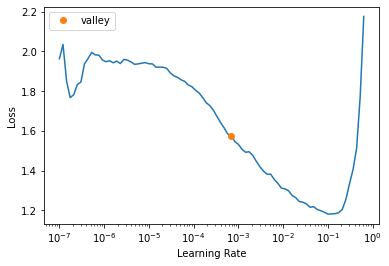

In [19]:
learn3=cnn_learner(dls,resnet50, metrics=accuracy)
learn3.lr_find()

In [20]:
learn3.fit_one_cycle(10,0.0007)

epoch,train_loss,valid_loss,accuracy,time
0,1.471006,1.129377,0.672515,00:24
1,1.058570,0.797131,0.766082,00:24
2,0.855749,0.876654,0.742690,00:25
3,0.721281,1.179093,0.695906,00:25
4,0.625111,1.009285,0.754386,00:25
5,0.550657,0.880556,0.789474,00:24
6,0.503900,0.902251,0.771930,00:25
7,0.457921,0.892717,0.777778,00:25
8,0.419805,0.890870,0.783626,00:25
9,0.409497,0.930451,0.760234,00:24


SuggestedLRs(valley=0.0003981071640737355)

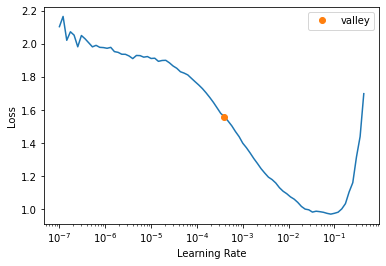

In [21]:
db4=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
            get_items=get_image_files,get_y=parent_label,
            splitter=GrandparentSplitter(train_name='train',valid_name='test'),
            item_tfms=Resize(250),batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
dls4=db4.dataloaders(path)
learn4=cnn_learner(dls4,resnet50,metrics=accuracy)
learn4.lr_find()

In [22]:
learn4.fit_one_cycle(25,0.0004)

epoch,train_loss,valid_loss,accuracy,time
0,1.621680,1.217380,0.467836,00:31
1,1.301524,1.068315,0.561404,00:27
2,1.006515,0.812030,0.684211,00:29
3,0.796613,0.832302,0.730994,00:27
4,0.642488,0.981616,0.695906,00:28
5,0.532374,0.792237,0.713450,00:27
6,0.443383,0.848391,0.707602,00:29
7,0.375471,0.734733,0.707602,00:28
8,0.304642,0.646559,0.771930,00:28
9,0.266997,0.727812,0.748538,00:28


In [32]:
db5=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
            get_items=get_image_files,get_y=parent_label,
            splitter=GrandparentSplitter(train_name='train',valid_name='test'),
            item_tfms=Resize(460),batch_tfms=[*aug_transforms(size=224, min_scale=0.8), Normalize.from_stats(*imagenet_stats)])
dls5=db5.dataloaders(path)
learn5=cnn_learner(dls5,resnet50,metrics=accuracy)
# learn5.lr_find()

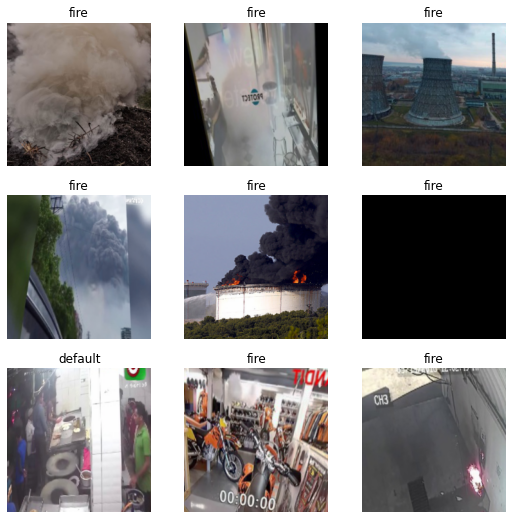

In [33]:
dls5.show_batch()

In [34]:
learn5.fit_one_cycle(10,0.0014)

epoch,train_loss,valid_loss,accuracy,time
0,1.096889,0.796839,0.713450,00:25
1,0.851576,0.700572,0.754386,00:25
2,0.691469,1.040991,0.777778,00:24
3,0.525476,0.872622,0.695906,00:24
4,0.410443,0.556857,0.795322,00:24
5,0.325335,0.527251,0.801170,00:24
6,0.261922,0.567795,0.824561,00:24
7,0.214568,0.602898,0.824561,00:25
8,0.174431,0.620534,0.830409,00:25
9,0.143968,0.552598,0.836257,00:25


In [35]:
interp=ClassificationInterpretation.from_learner(learn5)


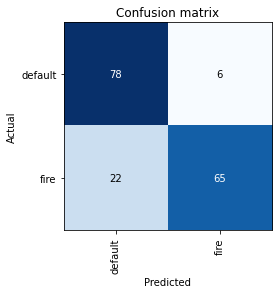

In [36]:
interp.plot_confusion_matrix()

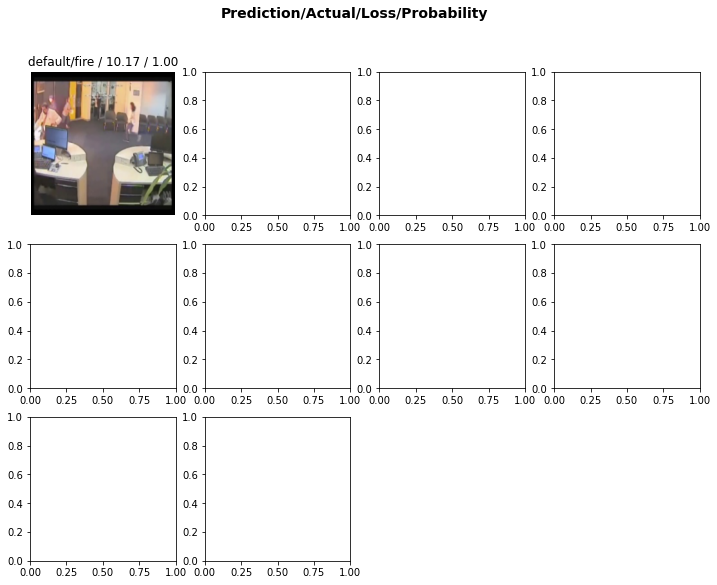

In [37]:
interp.plot_top_losses(10)

In [25]:
from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

# Cell
#nbdev_comment _all_ = ['HBox','VBox','widgets','Button','Checkbox','Dropdown','Layout','Box','Output','Label','FileUpload']

# Cell
@patch
def __getitem__(self:Box, i): return self.children[i]

# Cell
def widget(im, *args, **layout):
    "Convert anything that can be `display`ed by IPython into a widget"
    o = Output(layout=merge(*args, layout))
    with o: display(im)
    return o

# Cell
def _update_children(change):
    for o in change['owner'].children:
        if not o.layout.flex: o.layout.flex = '0 0 auto'

# Cell
def carousel(children=(), **layout):
    "A horizontally scrolling carousel"
    def_layout = dict(overflow='scroll hidden', flex_flow='row', display='flex')
    res = Box([], layout=merge(def_layout, layout))
    res.observe(_update_children, names='children')
    res.children = children
    return res

# Cell
def _open_thumb(fn, h, w): return Image.open(fn).to_thumb(h, w).convert('RGBA')

# Cell
class ImagesCleaner:
    "A widget that displays all images in `fns` along with a `Dropdown`"
    def __init__(self, opts=(), height=128, width=256, max_n=30):
        opts = ('<Keep>', '<Delete>')+tuple(opts)
        store_attr('opts,height,width,max_n')
        self.widget = carousel(width='100%')

    def set_fns(self, fns):
        self.fns = L(fns)[:self.max_n]
        ims = parallel(_open_thumb, self.fns, h=self.height, w=self.width, progress=False,
                       n_workers=min(len(self.fns)//10,defaults.cpus))
        self.widget.children = [VBox([widget(im, height=f'{self.height}px'), Dropdown(
            options=self.opts, layout={'width': 'max-content'})]) for im in ims]

    def _ipython_display_(self): display(self.widget)
    def values(self): return L(self.widget.children).itemgot(1).attrgot('value')
    def delete(self): return self.values().argwhere(eq('<Delete>'))
    def change(self):
        idxs = self.values().argwhere(not_(in_(['<Delete>','<Keep>'])))
        return idxs.zipwith(self.values()[idxs])

# Cell
def _get_iw_info(learn, ds_idx=0):
    dl = learn.dls[ds_idx].new(shuffle=False, drop_last=False)
    probs,targs,preds,losses = learn.get_preds(dl=dl, with_input=False, with_loss=True, with_decoded=True)
    targs = [dl.vocab[t] for t in targs]
    return L([dl.dataset.items,targs,losses]).zip()

# Cell
@delegates(ImagesCleaner)
class ImageClassifierCleaner(GetAttr):
    "A widget that provides an `ImagesCleaner` with a CNN `Learner`"
    def __init__(self, learn, **kwargs):
        vocab = learn.dls.vocab
        self.default = self.iw = ImagesCleaner(vocab, **kwargs)
        self.dd_cats = Dropdown(options=vocab)
        self.dd_ds   = Dropdown(options=('Train','Valid'))
        self.iwis = _get_iw_info(learn,0),_get_iw_info(learn,1)
        self.dd_ds.observe(self.on_change_ds, 'value')
        self.dd_cats.observe(self.on_change_ds, 'value')
        self.on_change_ds()
        self.widget = VBox([self.dd_cats, self.dd_ds, self.iw.widget])

    def _ipython_display_(self): display(self.widget)
    def on_change_ds(self, change=None):
        info = L(o for o in self.iwis[self.dd_ds.index] if o[1]==self.dd_cats.value)
        self.iw.set_fns(info.sorted(2, reverse=True).itemgot(0))

In [38]:
cleaner=ImageClassifierCleaner(learn5)

In [27]:
fns=get_image_files(path)

In [29]:
verify_images(fns)

(#0) []

In [41]:
cleaner

In [24]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [42]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

FileNotFoundError: ignored

In [43]:
(path/'train'/'default').ls()

(#143) [Path('data/data/img_data/train/default/img_62.jpg'),Path('data/data/img_data/train/default/img_502.jpg'),Path('data/data/img_data/train/default/img_66.jpg'),Path('data/data/img_data/train/default/img_920.jpg'),Path('data/data/img_data/train/default/img_3000.jpg'),Path('data/data/img_data/train/default/img_7.jpg'),Path('data/data/img_data/train/default/img_602.jpg'),Path('data/data/img_data/train/default/img_75.jpg'),Path('data/data/img_data/train/default/img_1014.jpg'),Path('data/data/img_data/train/default/img_519.jpg')...]

In [44]:
(path/'train'/'fire').ls()

(#865) [Path('data/data/img_data/train/fire/img_819.jpg'),Path('data/data/img_data/train/fire/img_385.jpg'),Path('data/data/img_data/train/fire/2.WhatsApp_Image_2018-05-29_at_8.jpeg'),Path('data/data/img_data/train/fire/img_824.jpg'),Path('data/data/img_data/train/fire/53.400_F_248118663_wLIdS25iBbKBVWhBu4Q8D3eYGyCws0if.jpg'),Path('data/data/img_data/train/fire/78.waffle-fire.jpg'),Path('data/data/img_data/train/fire/img_1054.jpg'),Path('data/data/img_data/train/fire/37.APTOPIX-Petrochemical-Fire-Texas-1-1553128135.jpg'),Path('data/data/img_data/train/fire/43.1089126196672_10702591.jpg'),Path('data/data/img_data/train/fire/19.920x920.jpg')...]

In [45]:
db=DataBlock(blocks=(ImageBlock(),CategoryBlock()),
            get_items=get_image_files,get_y=parent_label,
            splitter=GrandparentSplitter(train_name='train',valid_name='test'),
            item_tfms=RandomResizedCrop(460),batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dls=db.dataloaders(path)

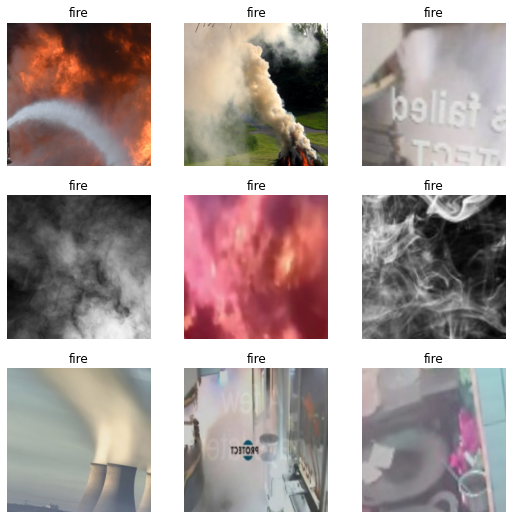

In [46]:
dls.show_batch()

In [47]:
learn=cnn_learner(dls, resnet50,metrics=accuracy)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.978976,0.959331,0.666667,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.762773,1.182760,0.695906,00:32
1,0.578854,1.529362,0.795322,00:29
2,0.445530,1.120585,0.777778,00:29
3,0.353510,0.533663,0.877193,00:30
4,0.275351,0.435749,0.830409,00:29
5,0.218115,0.422571,0.812865,00:29


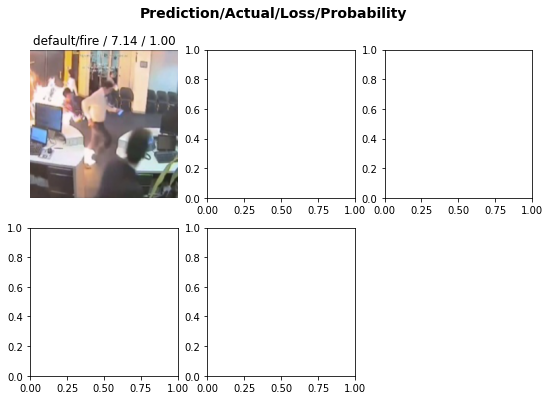

In [49]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(5)